In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.3/800.3 kB 21.6 MB/s eta 0:00:0000:01


In [5]:
import os
from ultralytics import YOLO
from IPython.display import display, Image
from IPython import display
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np

display.clear_output()
!yolo mode = checks

Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 649, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/opt/conda/lib/python3.10/site-packages/ultralytics/utils/checks.py'>'. Valid modes are {'train', 'benchmark', 'predict', 'export', 'track', 'val'}.

    Arguments received: ['yolo', 'mode', '=', 'checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'classify', 'obb', 'pose', 'segment', 'detect'}
                MODE (required) is one of {'train', 'benchmark', 'predict', 'export', 'track', 'val'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all AR

# **Loading the YOLOv8 Model**

In [3]:
## 2 ways to Load a model
# first one is ---->

model = YOLO("yolov8n.yaml")  # build a new model from YAML
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)
model = YOLO("yolov8n.yaml").load("yolov8n.pt")  # build from YAML and transfer weights

# second one is ---->

#!yolo task=detect mode=train model=yolov8m.pt data="/kaggle/input/traffic-detection-project/data.yaml" epochs=5 imgsz=640

100%|██████████| 6.25M/6.25M [00:00<00:00, 101MB/s]


Transferred 355/355 items from pretrained weights


# **Getting the Data Paths**

Optional step if you don't have the configuration files (which you should) you can create it (based on your data ofc)

config_yaml = """test : /kaggle/input/traffic-detection-project/test/images
train : /kaggle/input/traffic-detection-project/train/images
val : /kaggle/input/traffic-detection-project/valid/images
    
nc : 5
classes : ["car", "motorbike", "person", "bicycle", "bus"]"""

with open("/kaggle/working/data.yaml", 'w') as file:
    file.write(config_yaml)

#To display the content of the file, you can use the 'cat' command like this:
%cat /kaggle/working/data.yaml

# **Training the Model**

We have to create an account in wandb.ai and use the api provided in the account

In [4]:
# Train the model
results = model.train(data="/kaggle/input/traffic-detection-project/data.yaml", epochs=3, imgsz = 640)
metrics = model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.2.56 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/kaggle/input/traffic-detection-project/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

100%|██████████| 755k/755k [00:00<00:00, 22.5MB/s]
2024-07-14 14:26:30,788	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-14 14:26:32,027	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/traffic-detection-project/train/labels... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [01:42<00:00, 56.81it/s] 


train: WARNING ⚠️ Cache directory /kaggle/input/traffic-detection-project/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/traffic-detection-project/valid/labels... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:10<00:00, 52.80it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/traffic-detection-project/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      2.53G      1.415      1.669      1.106        156        640: 100%|██████████| 363/363 [01:16<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.38it/s]


                   all        549       6270      0.735      0.607      0.675      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      2.51G      1.261      1.015      1.038        107        640: 100%|██████████| 363/363 [01:08<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.15it/s]

                   all        549       6270      0.739      0.665      0.729       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      2.53G      1.206      0.896      1.014        248        640: 100%|██████████| 363/363 [01:07<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.26it/s]

                   all        549       6270      0.773      0.727      0.792      0.537



3 epochs completed in 0.065 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.56 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.57it/s]


                   all        549       6270      0.773      0.727      0.792      0.537
               bicycle        189        250      0.886      0.608      0.783      0.565
                   bus         81        108      0.667      0.852      0.861      0.709
                   car        520       3842       0.83      0.903      0.929      0.681
             motorbike        331       1238      0.798      0.704      0.763      0.431
                person        196        832      0.682      0.567      0.624      0.298
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▁█▁
lr/pg1,▁█▁
lr/pg2,▁█▁
metrics/mAP50(B),▁▄█
metrics/mAP50-95(B),▁▄█
metrics/precision(B),▁▂█
metrics/recall(B),▁▄█
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▃▁


Ultralytics YOLOv8.2.56 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/traffic-detection-project/valid/labels... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<00:00, 885.75it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/traffic-detection-project/valid is not writeable, cache not saved.



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.76it/s]


                   all        549       6270      0.775      0.727      0.793      0.537
               bicycle        189        250      0.892      0.608      0.785      0.566
                   bus         81        108      0.668      0.852      0.861      0.709
                   car        520       3842      0.831      0.903      0.929      0.681
             motorbike        331       1238      0.802      0.704      0.764      0.431
                person        196        832      0.684      0.566      0.627      0.297
Speed: 0.2ms preprocess, 6.7ms inference, 0.0ms loss, 7.3ms postprocess per image
Results saved to runs/detect/train2


# **Results Visualization**

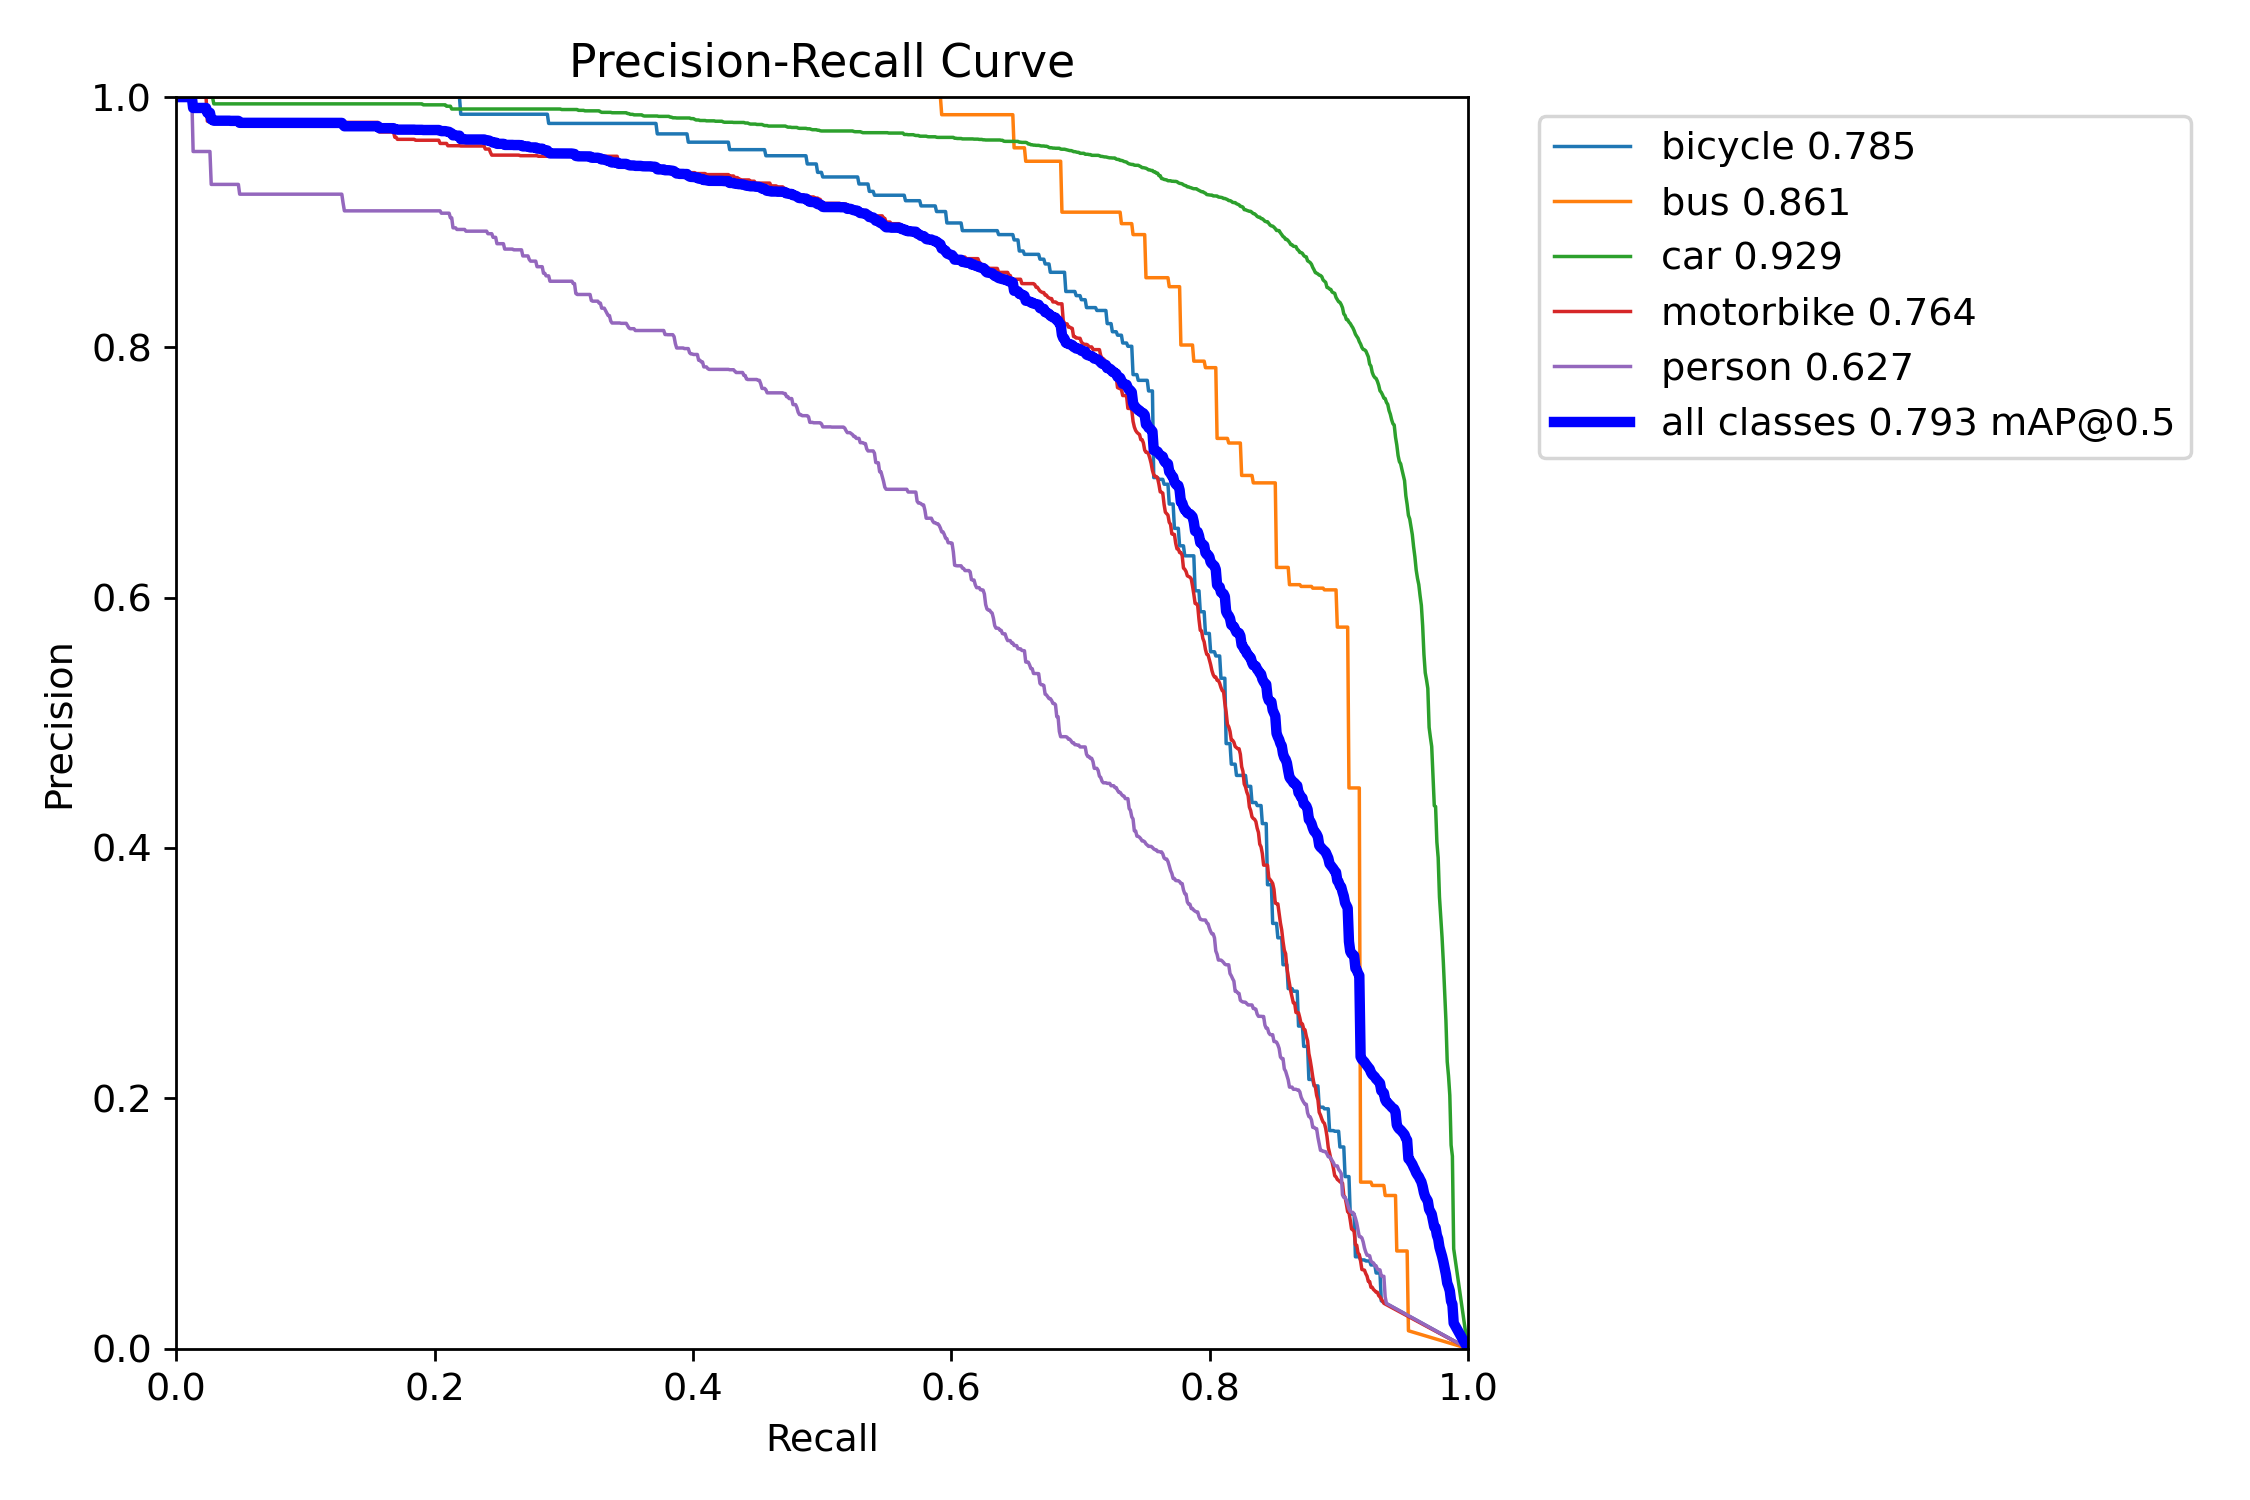

In [5]:
Image(filename = "/kaggle/working/runs/detect/train2/PR_curve.png", width = 600)

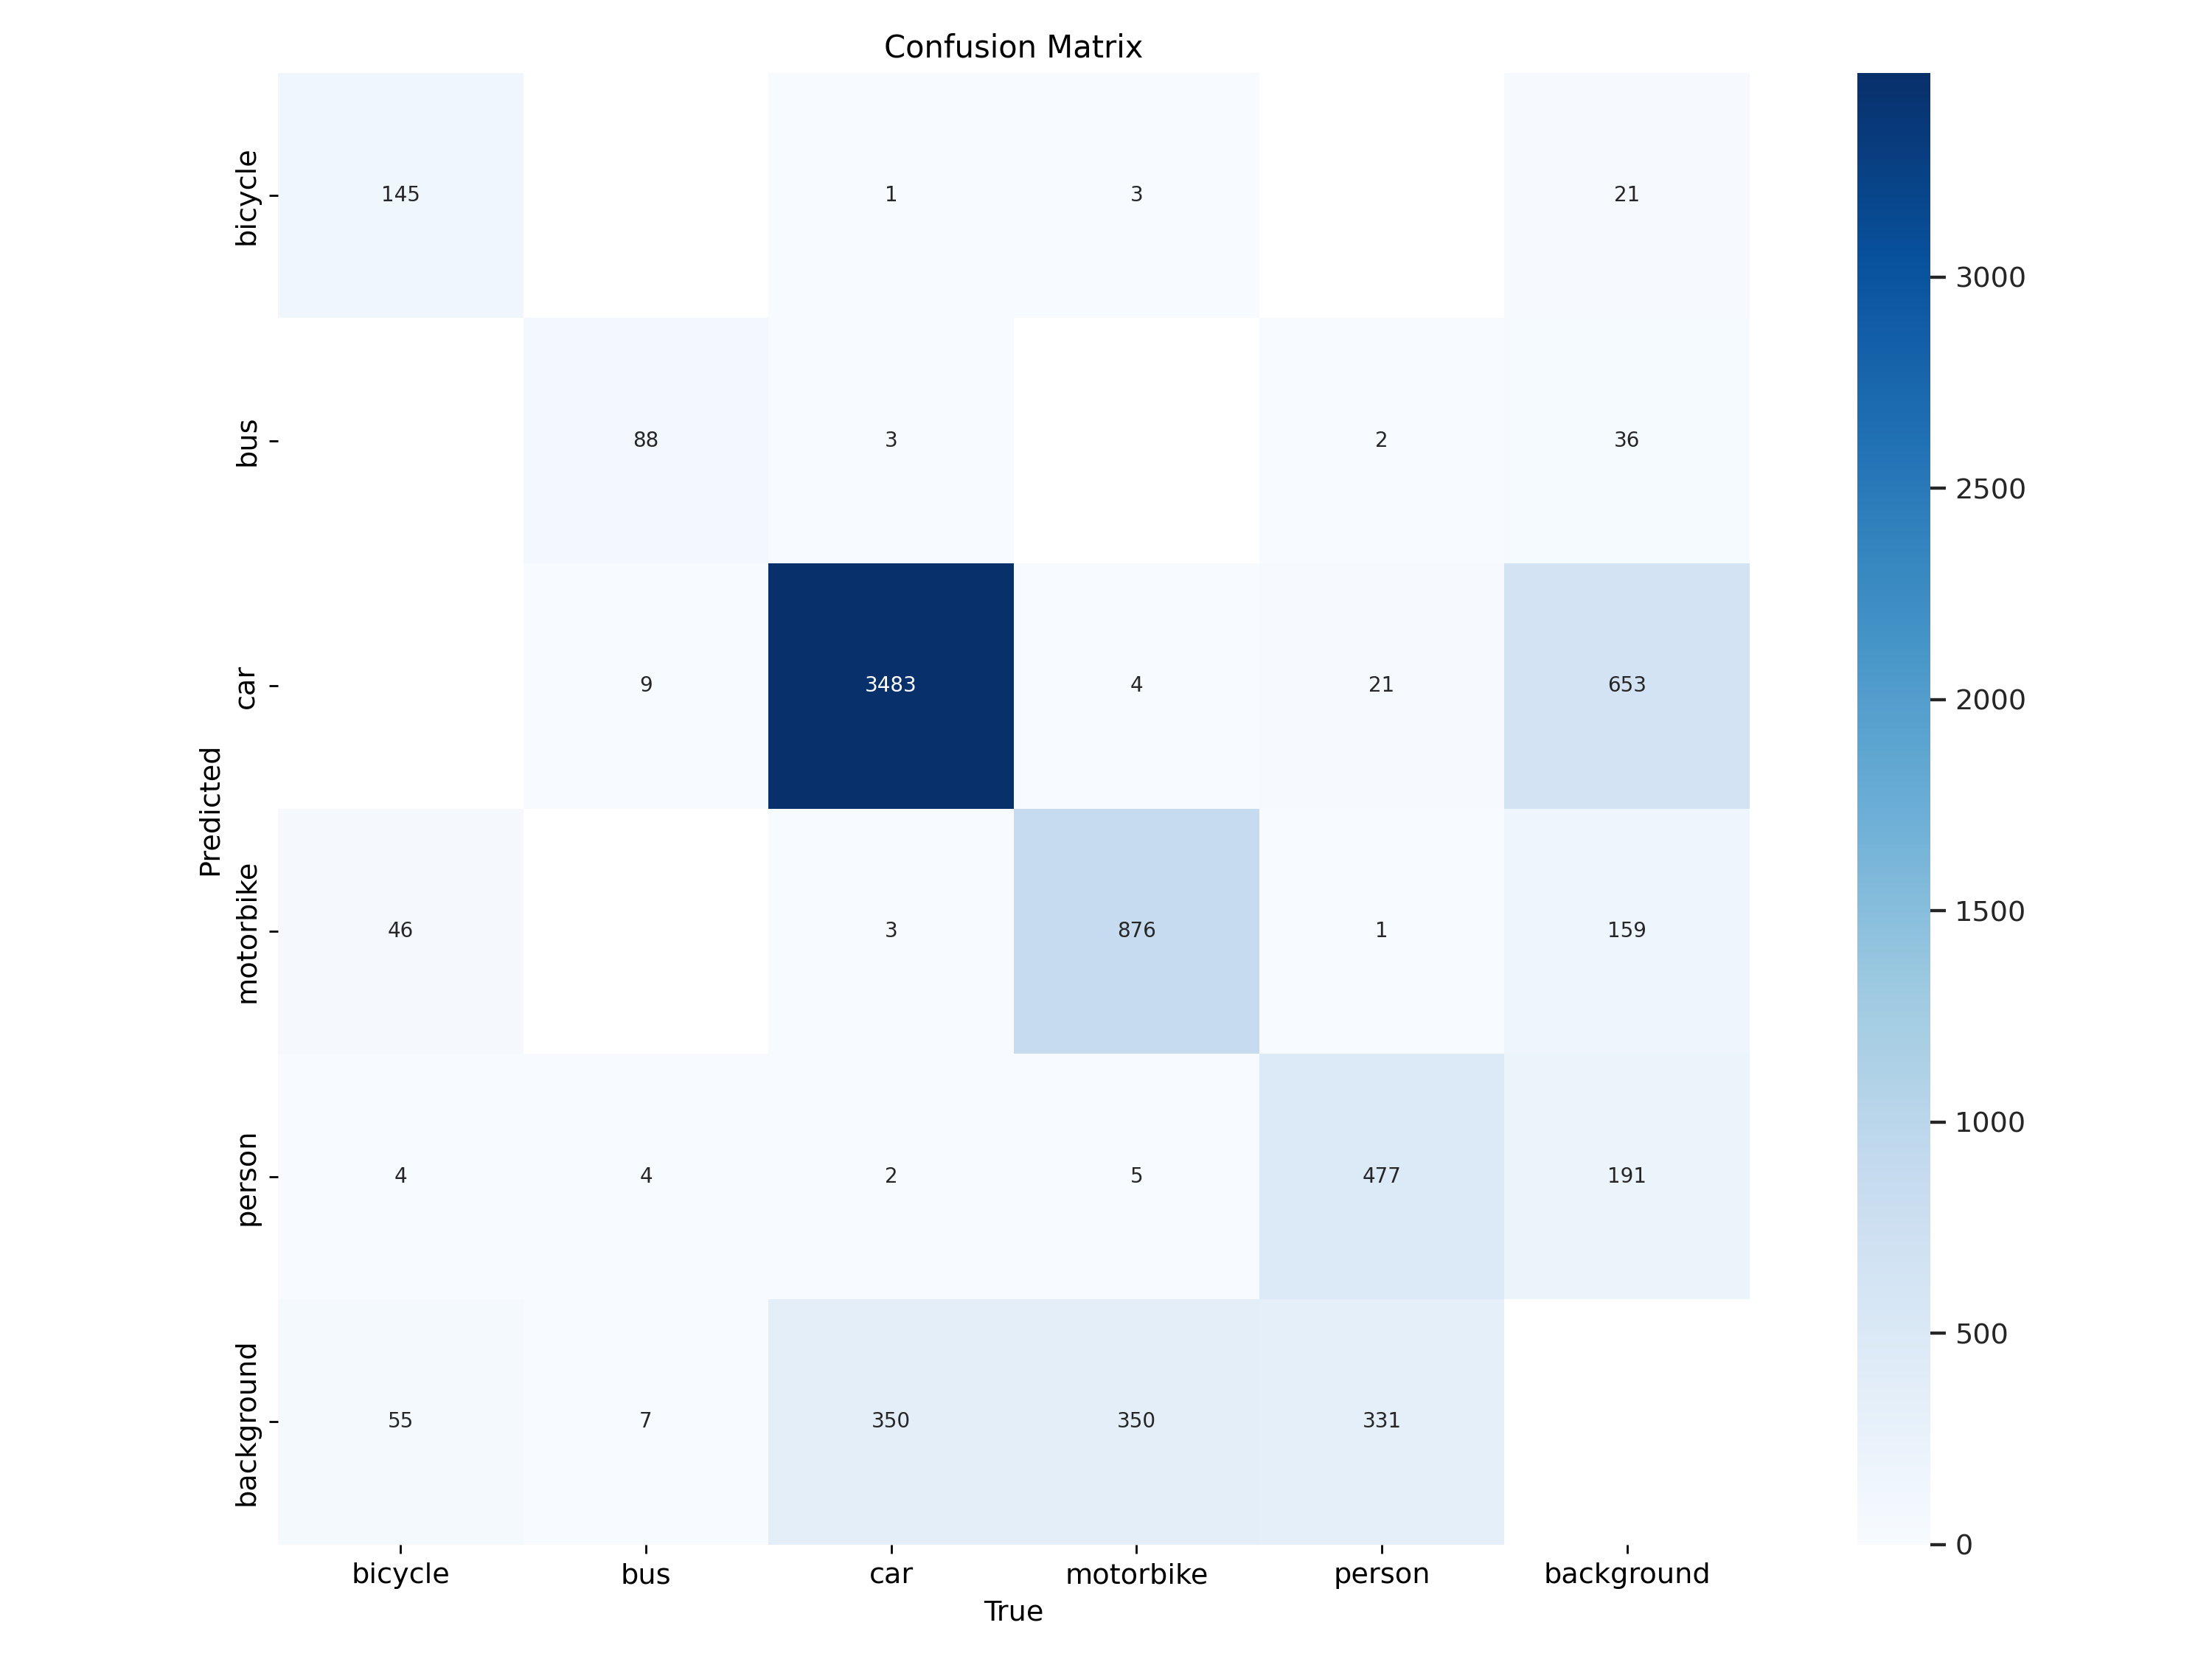

In [6]:
Image(filename = "/kaggle/working/runs/detect/train2/confusion_matrix.png", width = 600)

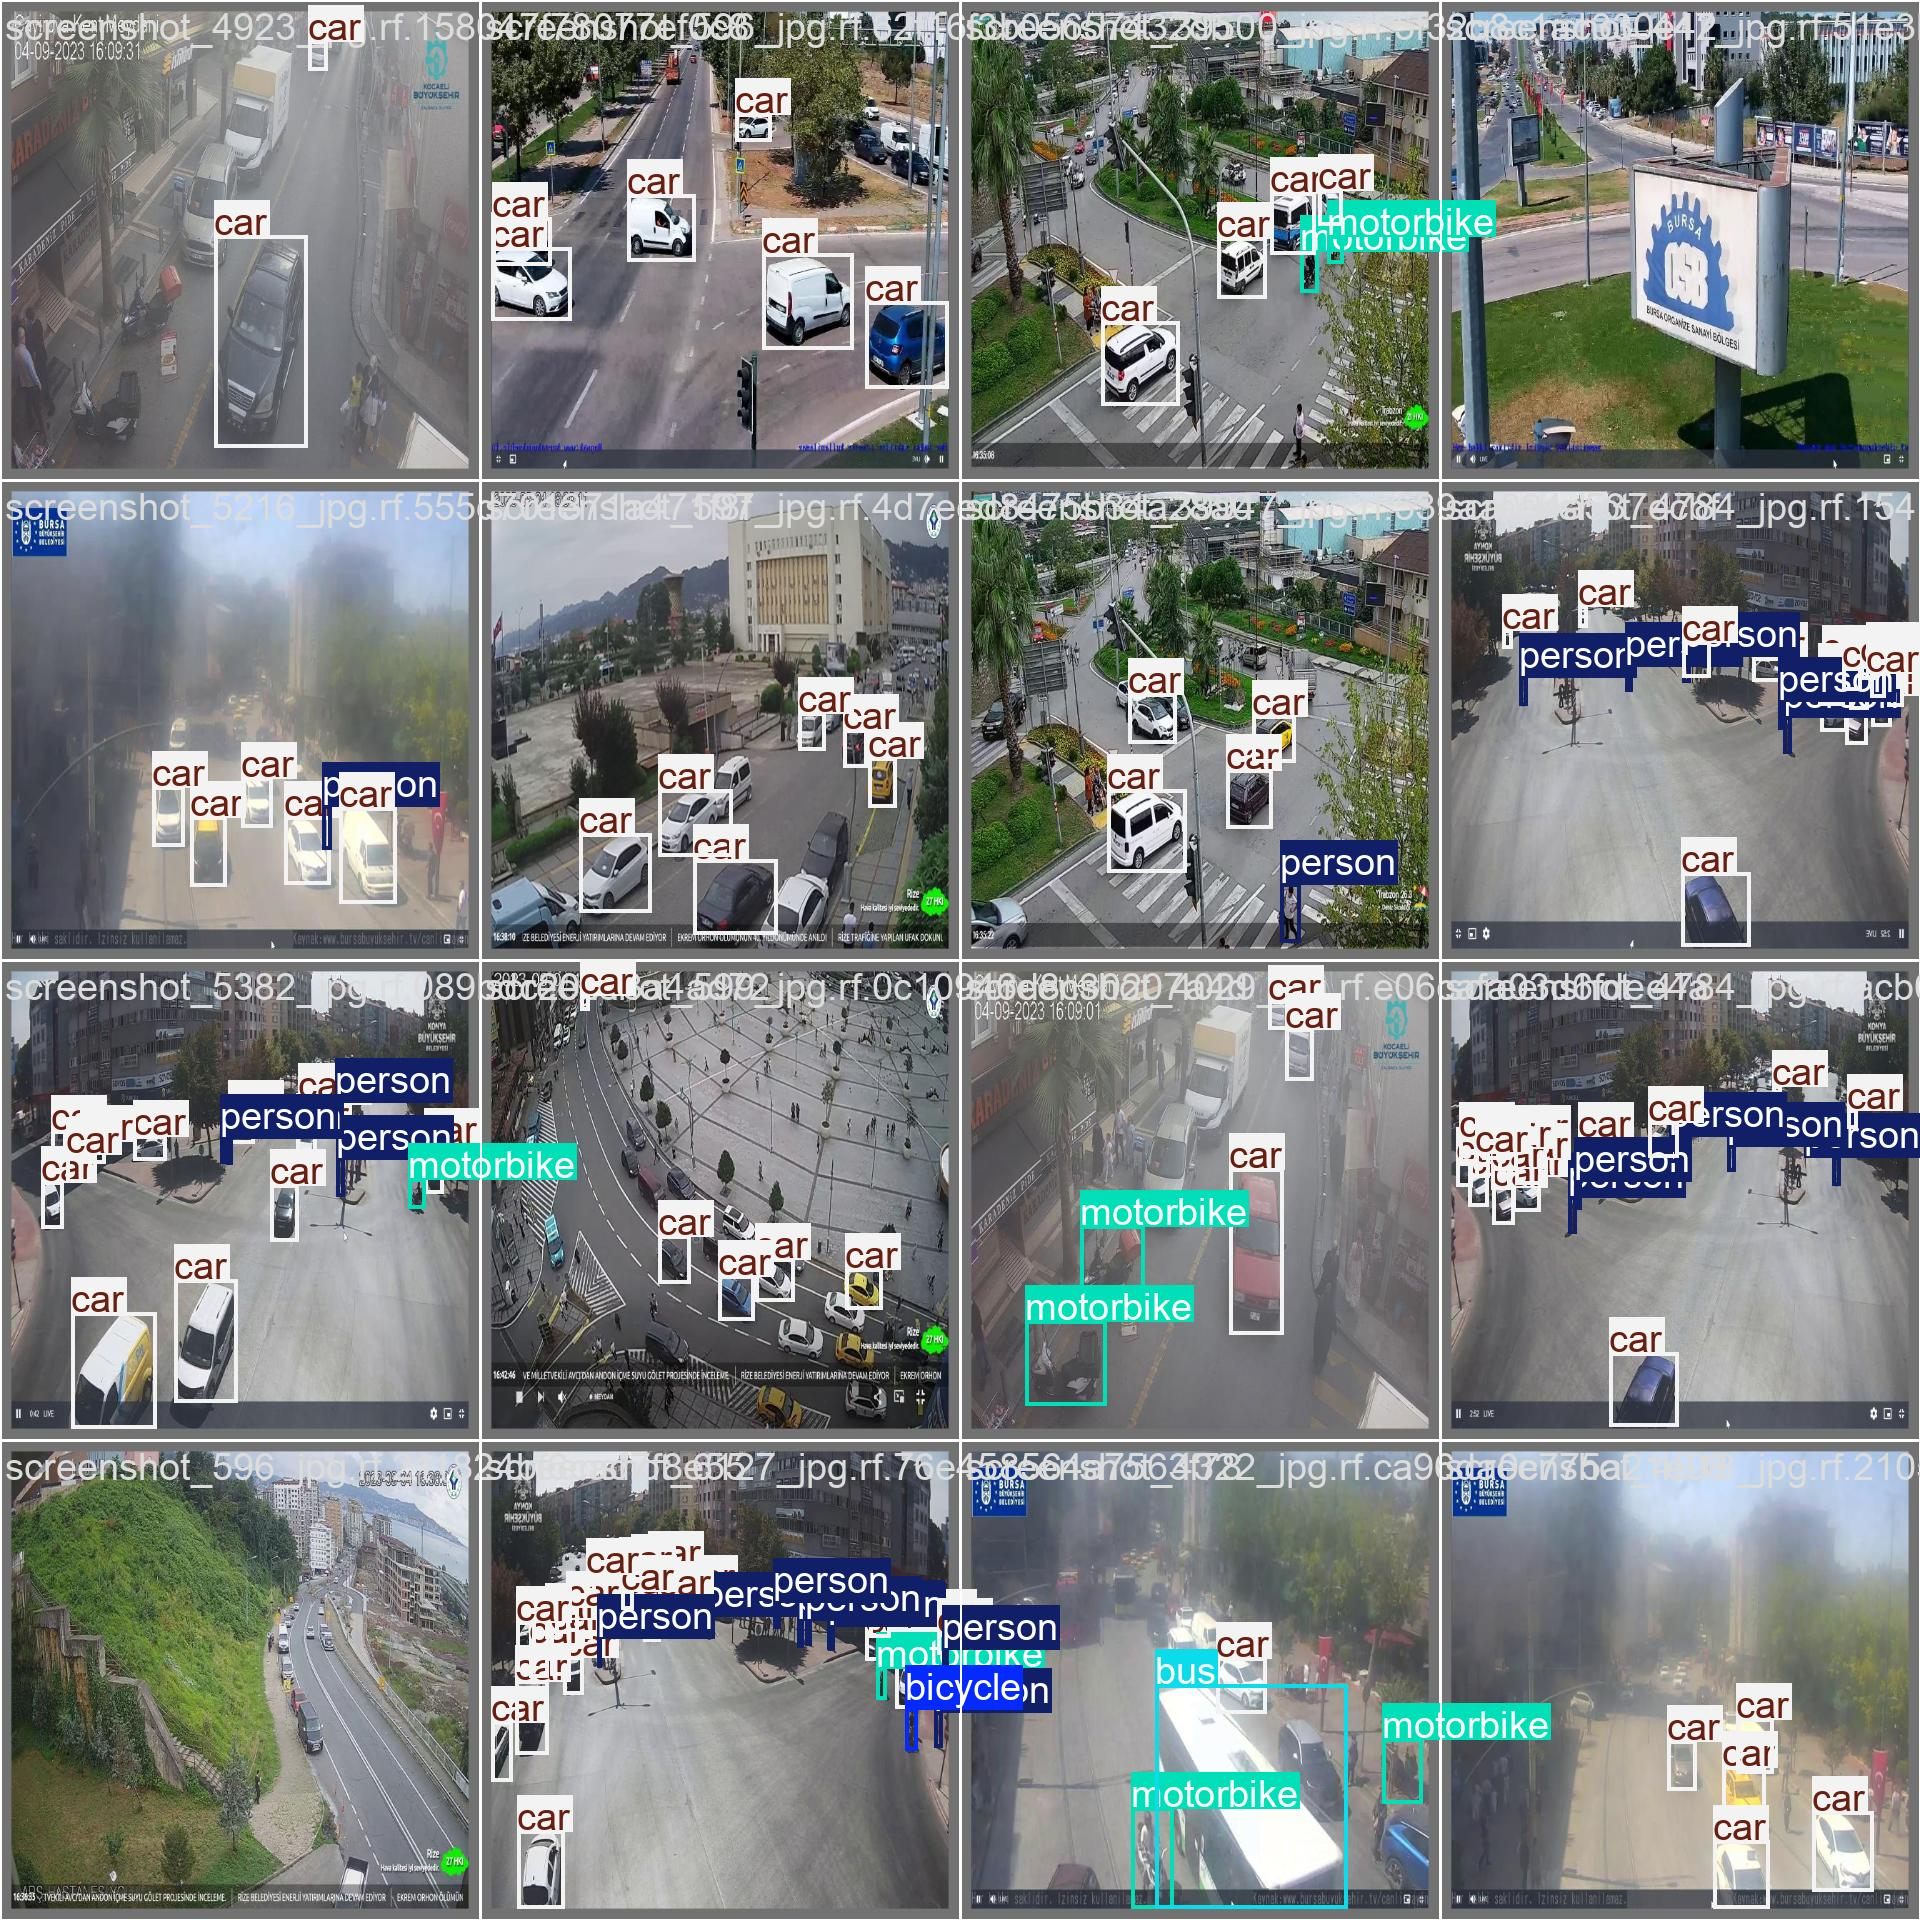

In [7]:
Image(filename = "/kaggle/working/runs/detect/train2/val_batch1_labels.jpg", width = 600)

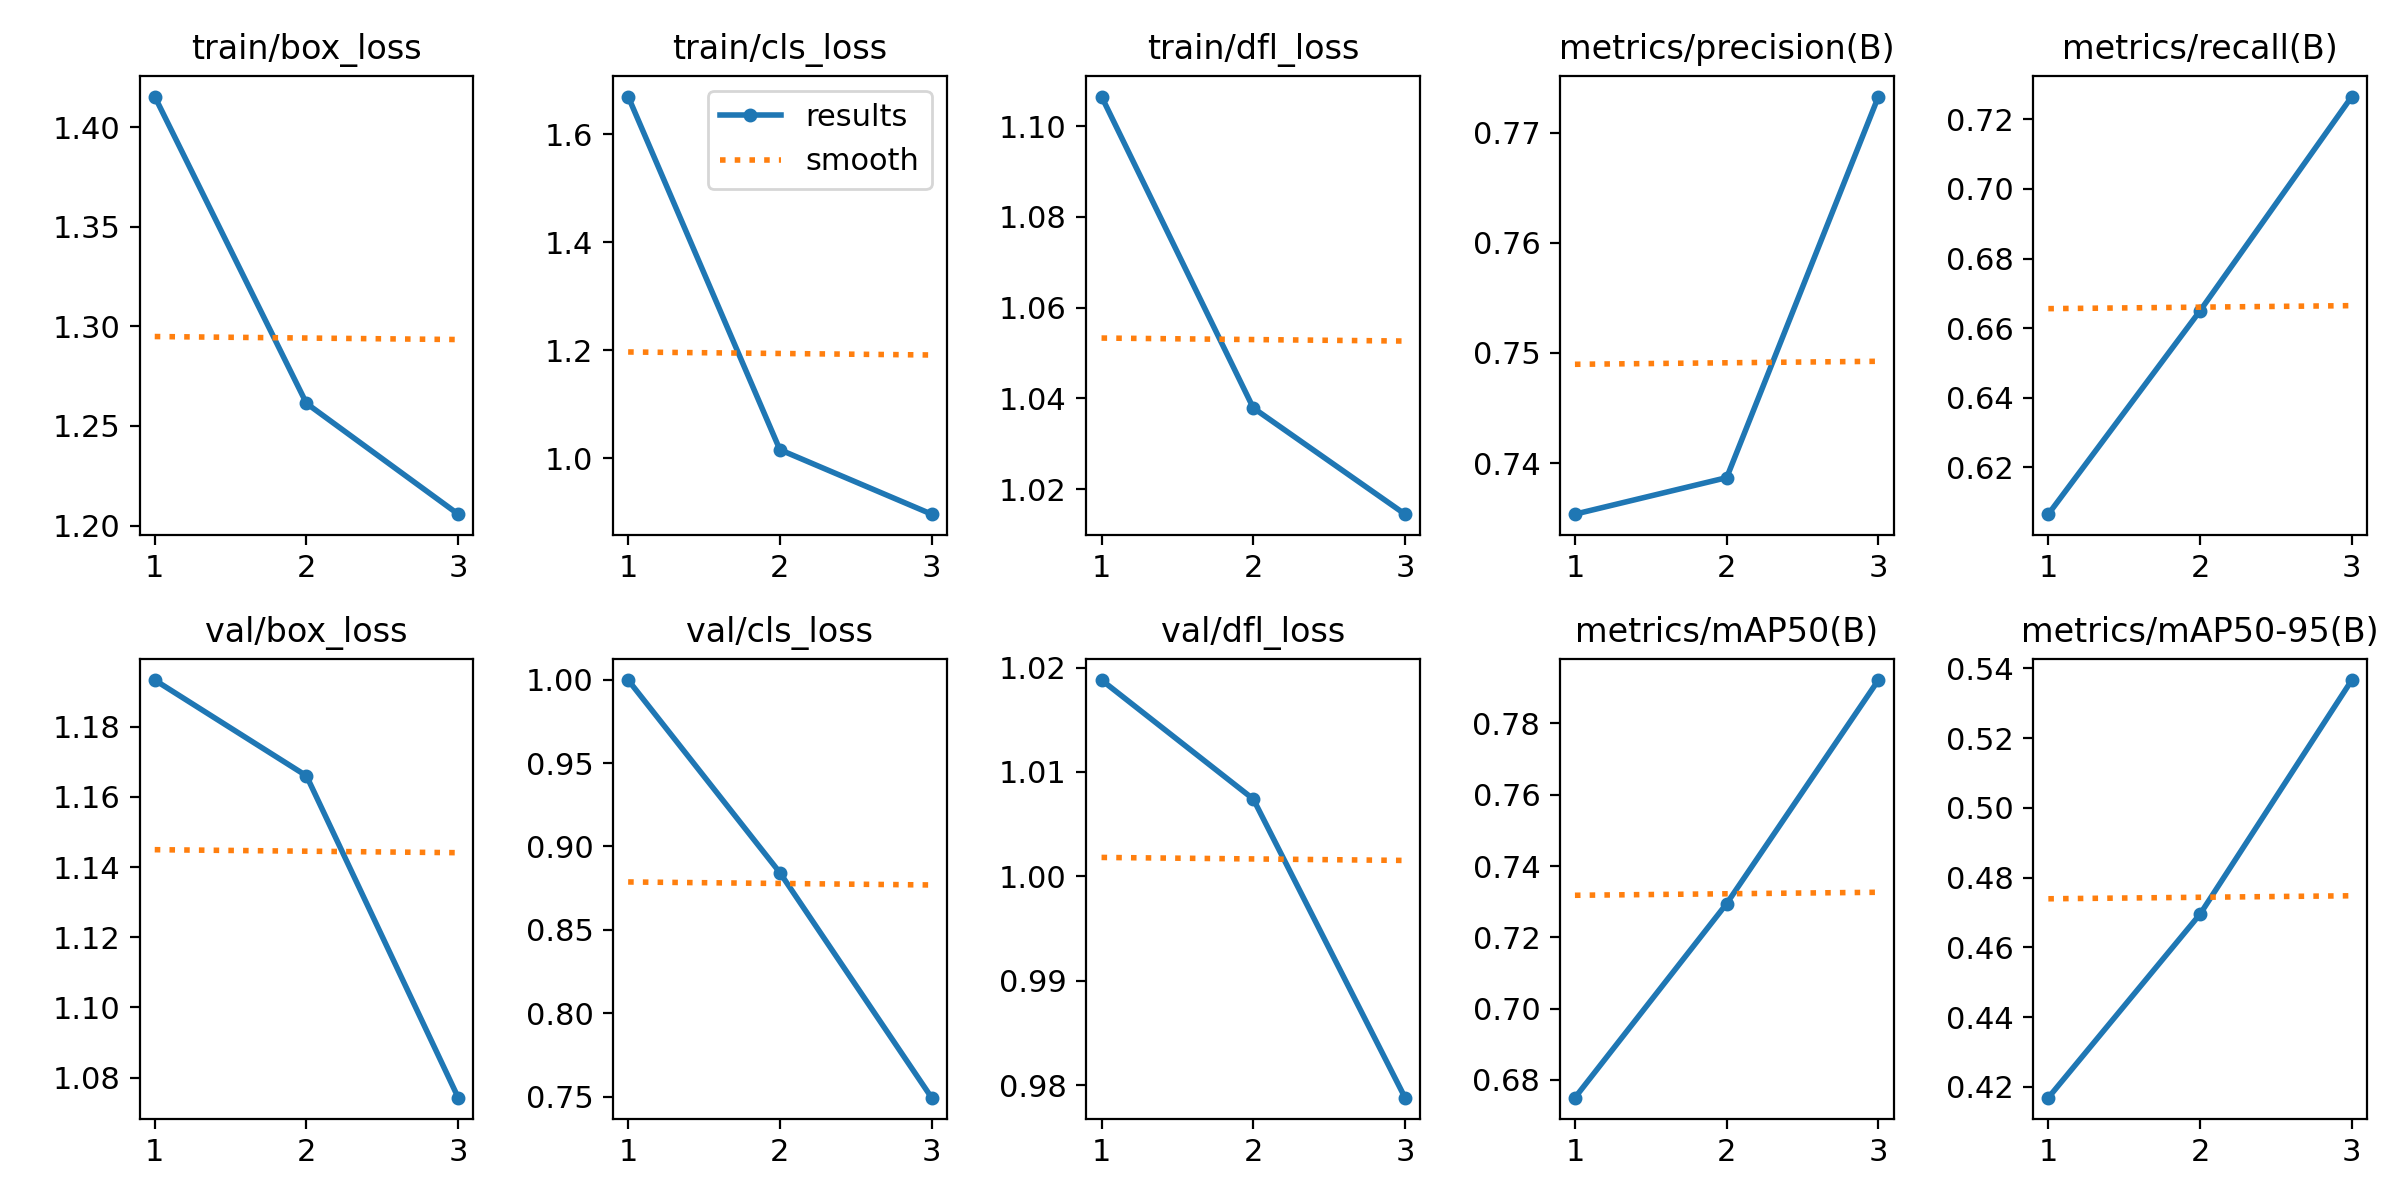

In [8]:
Image(filename = "/kaggle/working/runs/detect/train/results.png", width = 600)

# **Model Validation as a separate step**

In [9]:
val_results = model.val(model = "/kaggle/working/runs/detect/train3/weights/best.pt",  data="/kaggle/input/traffic-detection-project/data.yaml")

Ultralytics YOLOv8.2.56 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)


val: Scanning /kaggle/input/traffic-detection-project/valid/labels... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<00:00, 890.86it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/traffic-detection-project/valid is not writeable, cache not saved.


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.78it/s]


                   all        549       6270      0.775      0.727      0.793      0.537
               bicycle        189        250      0.892      0.608      0.785      0.566
                   bus         81        108      0.668      0.852      0.861      0.709
                   car        520       3842      0.831      0.903      0.929      0.681
             motorbike        331       1238      0.802      0.704      0.764      0.431
                person        196        832      0.684      0.566      0.627      0.297
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train3


# **Results Visualization**

Showing same graphs as we previously validated while training

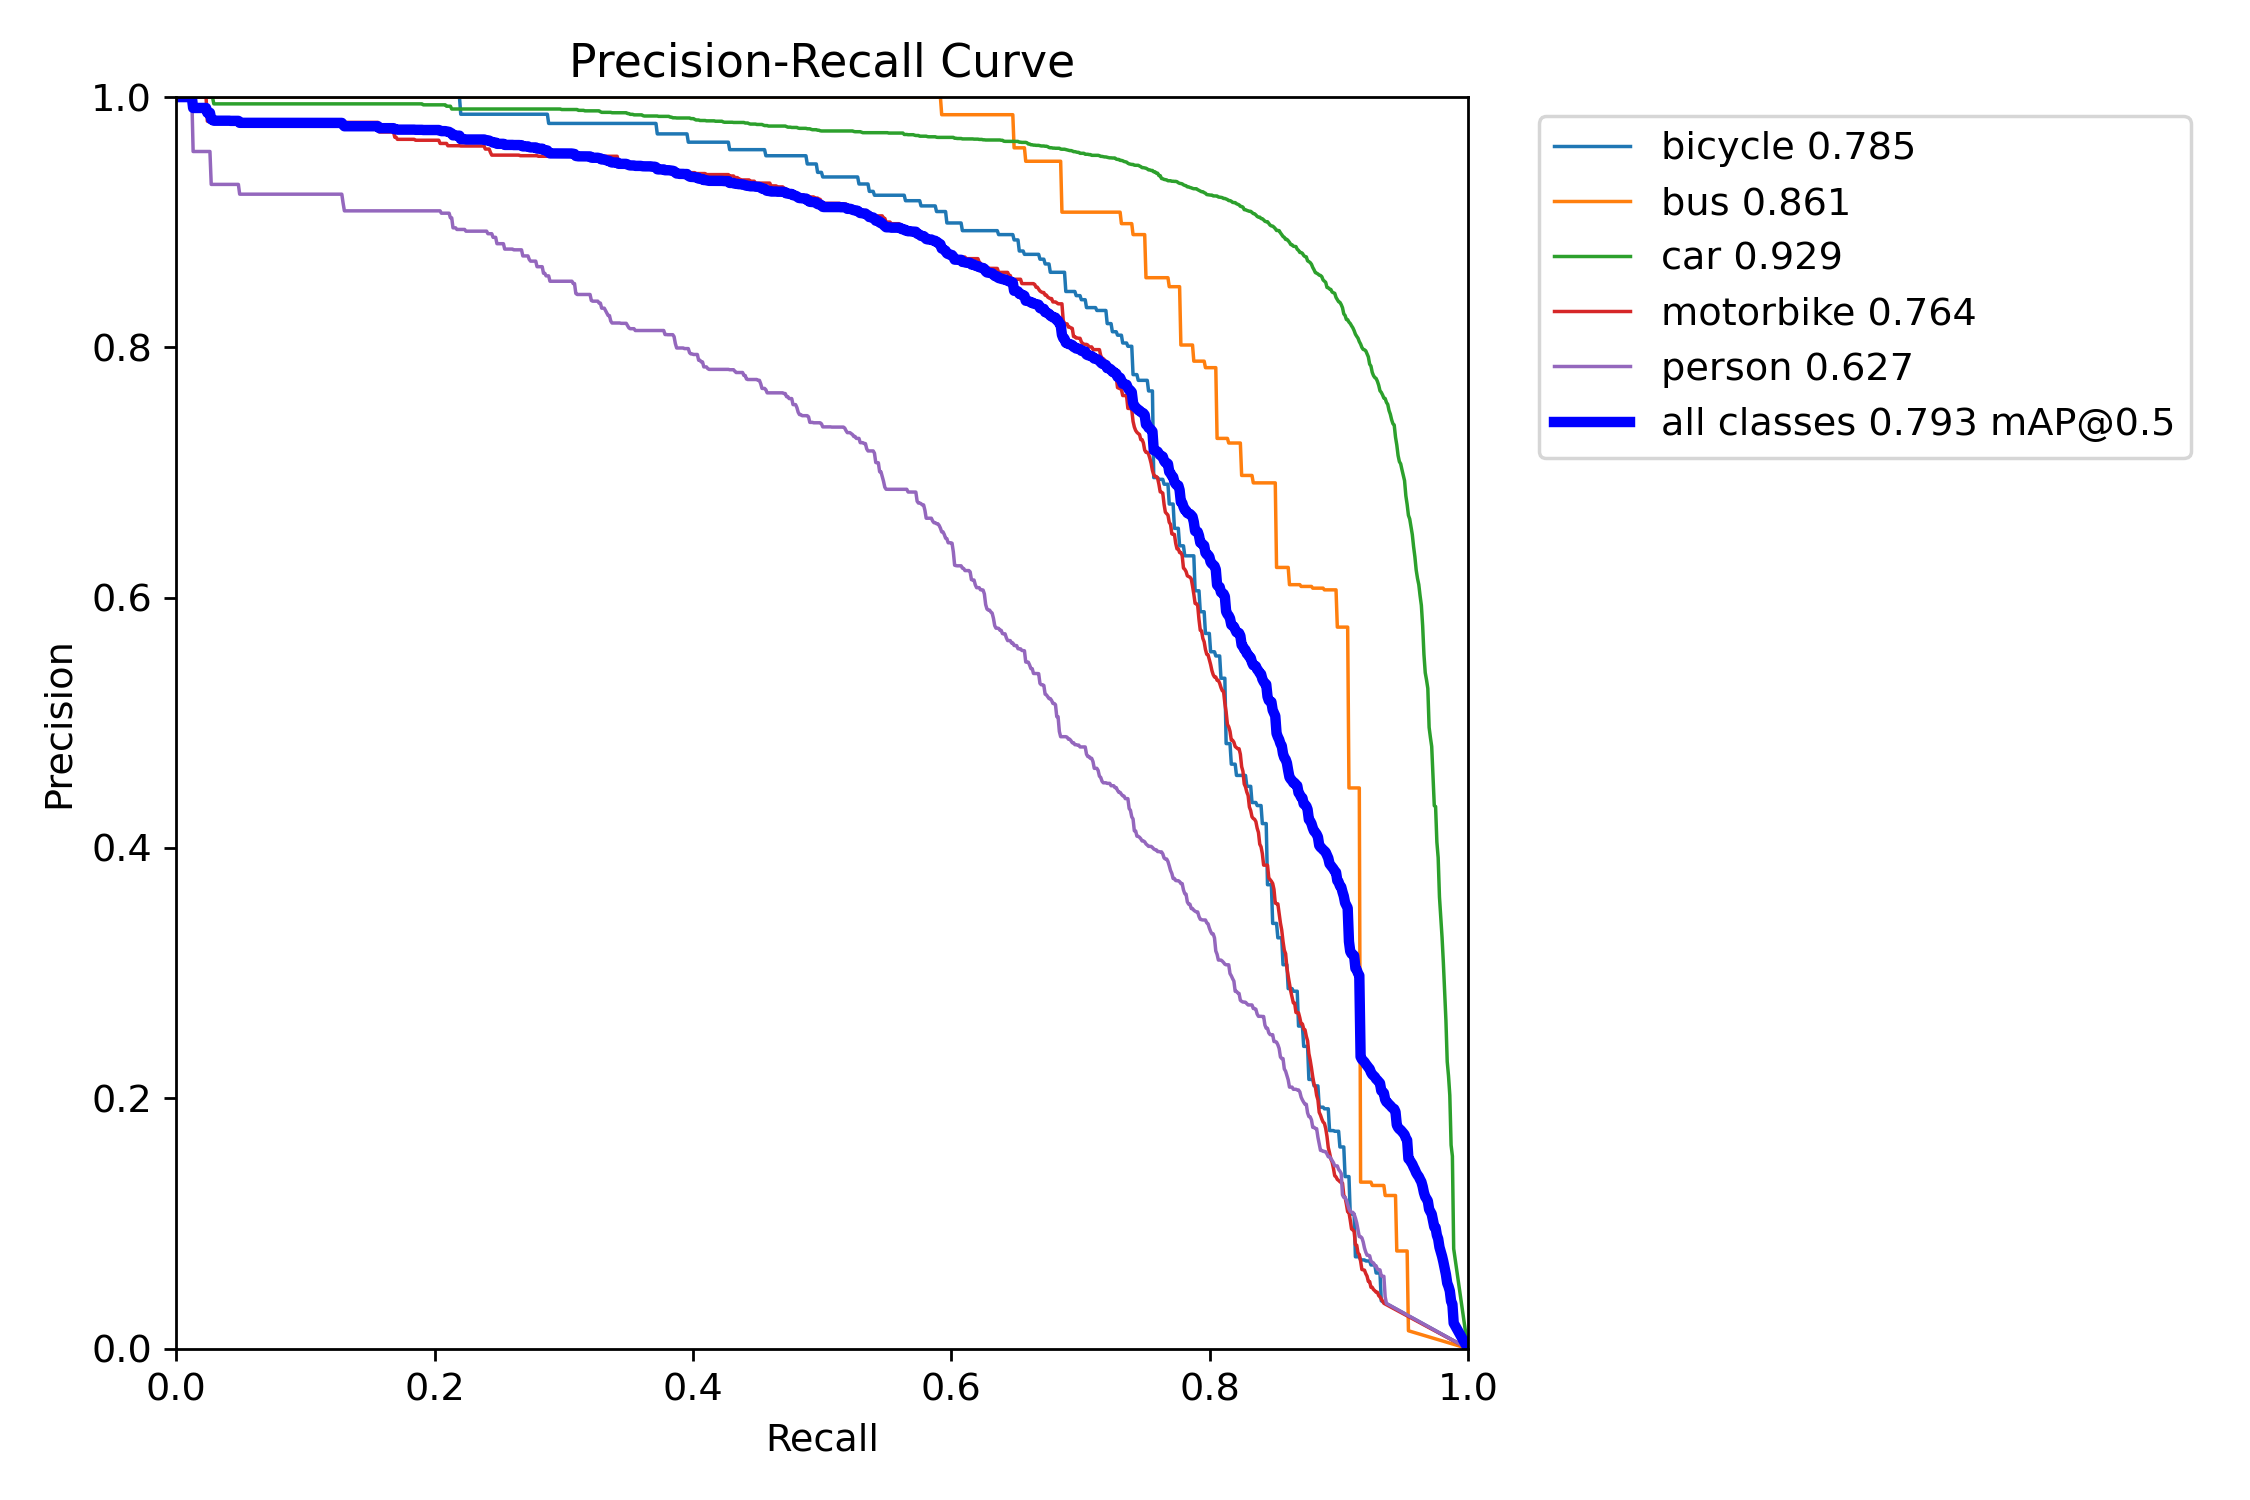

In [10]:
Image(filename = "/kaggle/working/runs/detect/train3/PR_curve.png", width = 600)

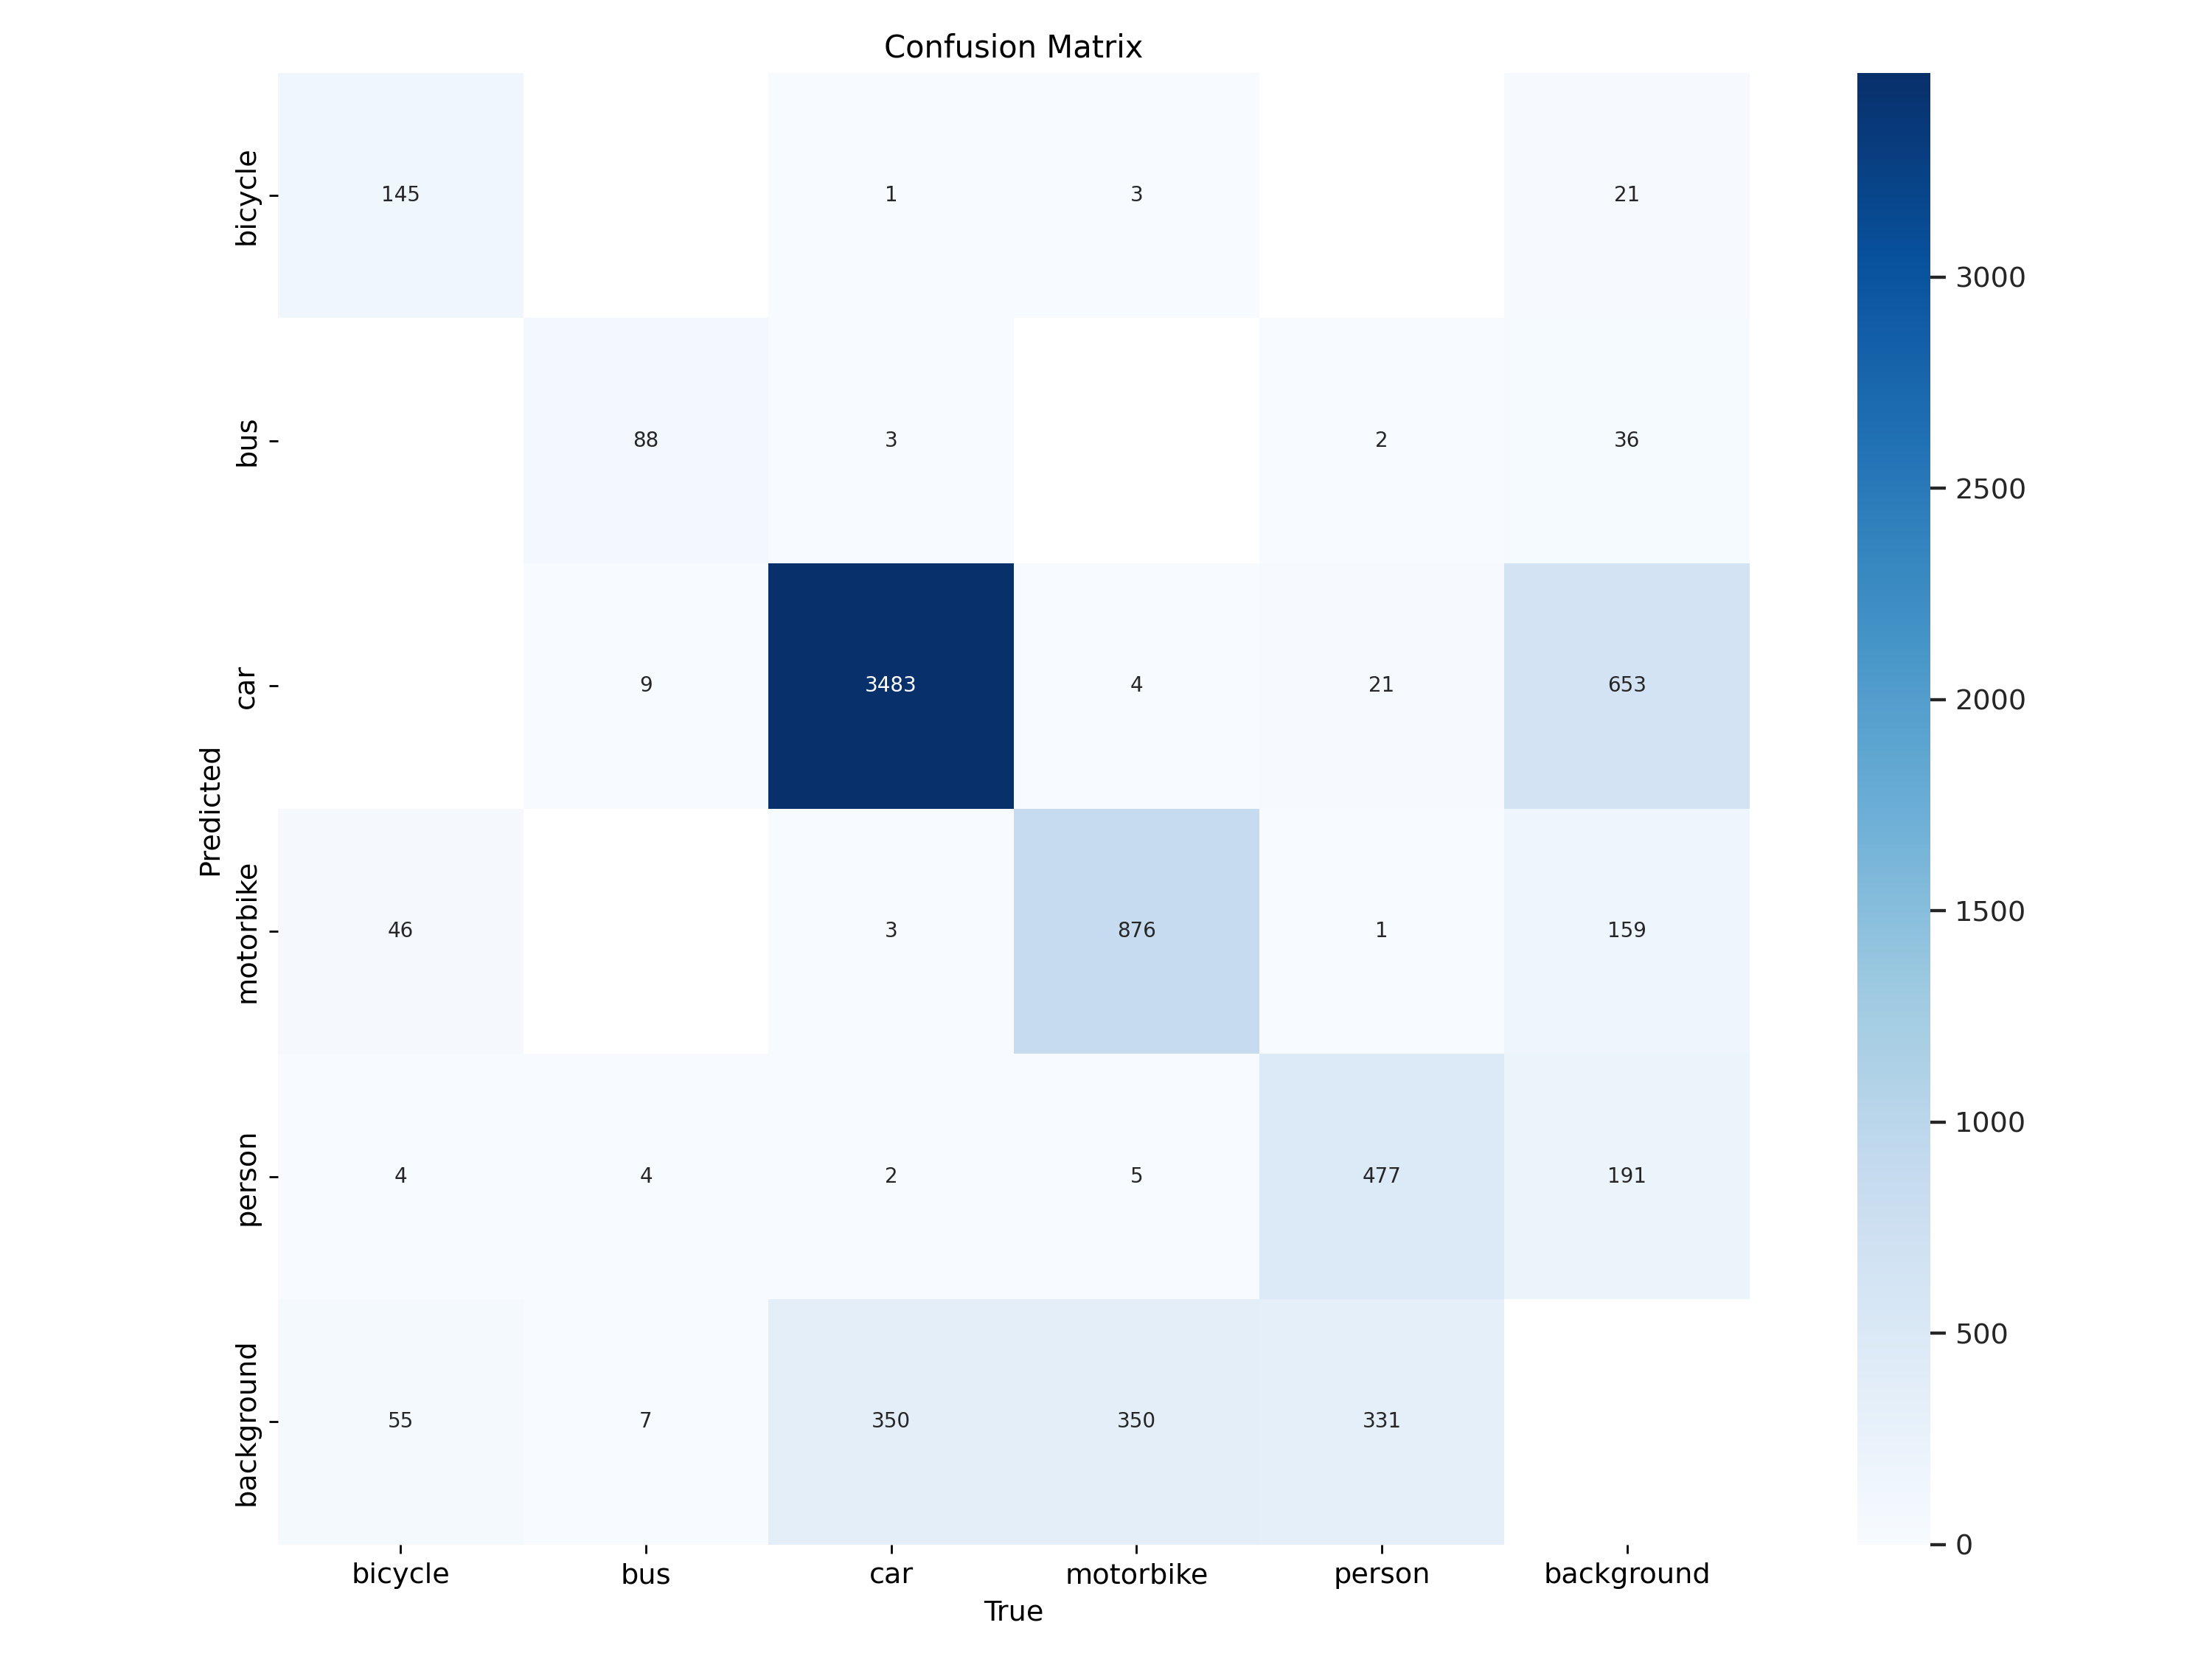

In [11]:
Image(filename = "/kaggle/working/runs/detect/train3/confusion_matrix.png", width = 600)

# **Prediction**

Using Device:  cpu
YOLOv8m summary (fused): 218 layers, 25,886,080 parameters, 0 gradients, 78.9 GFLOPs

0: 640x640 1 person, 1 bicycle, 21 cars, 1 bus, 894.0ms
Speed: 9.0ms preprocess, 894.0ms inference, 19.6ms postprocess per image at shape (1, 3, 640, 640)


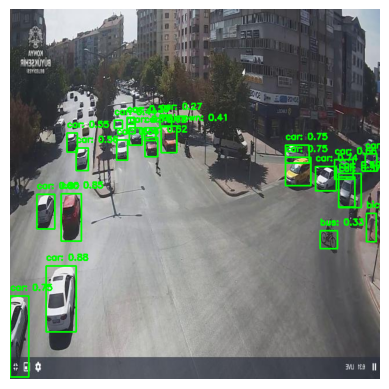


0: 640x640 9 persons, 11 cars, 1 airplane, 1 bus, 1 truck, 1 kite, 772.8ms
Speed: 2.1ms preprocess, 772.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


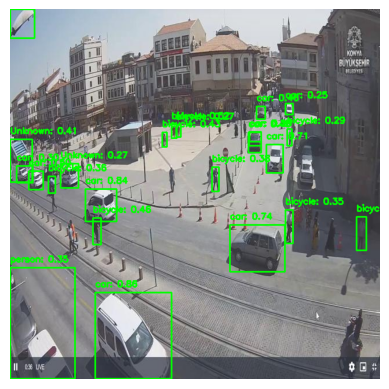


0: 640x640 1 person, 5 cars, 1 motorcycle, 9 trucks, 790.8ms
Speed: 2.2ms preprocess, 790.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


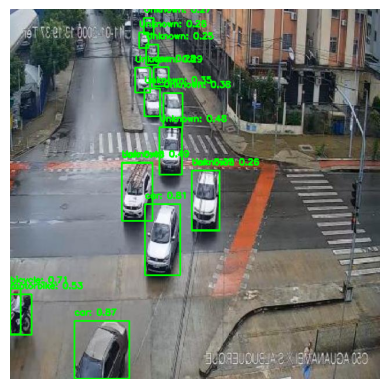


0: 640x640 1 person, 17 cars, 781.1ms
Speed: 2.7ms preprocess, 781.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


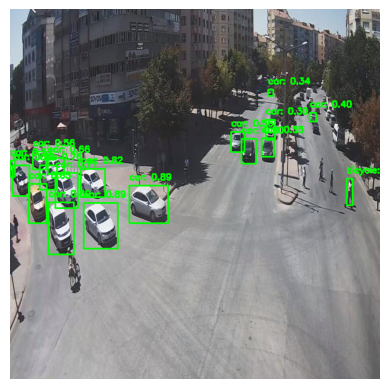


0: 640x640 5 cars, 1 bus, 1 truck, 788.4ms
Speed: 2.4ms preprocess, 788.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


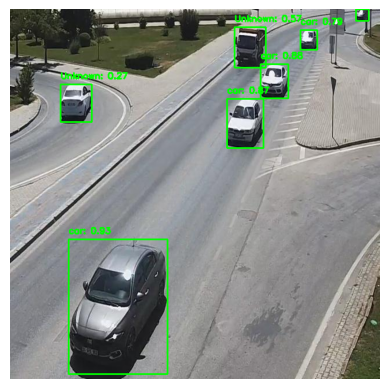


0: 640x640 3 persons, 3 cars, 2 trucks, 3 traffic lights, 780.0ms
Speed: 2.3ms preprocess, 780.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


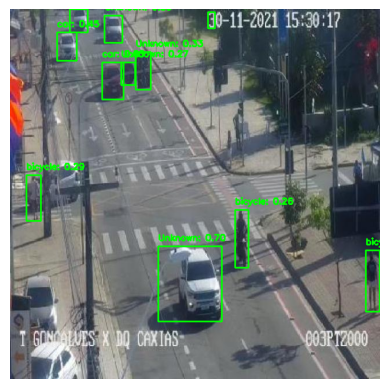

In [6]:
import torch
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

class ObjectDetection:
    # Custom class names
    CUSTOM_CLASSES = ['bicycle', 'bus', 'car', 'motorbike', 'person']
    
    def __init__(self):
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        print("Using Device: ", self.device)
        self.model = self.load_model()
        
    def load_model(self):
        model = YOLO("yolov8m.pt")  # Load pretrained YOLOv8 model
        model.fuse()  # Optimize the model for inference
        return model
    
    def predict(self, image):
        results = self.model(image)
        return results
    
    def plot_bboxes(self, results, image):
        xyxys = []
        confidences = []
        class_ids = []

        # Extract detections for each result
        for result in results:
            boxes = result.boxes.cpu().numpy()
            for box in boxes:
                # Append specific attributes
                xyxy = box.xyxy[0]
                conf = box.conf[0]
                cls = int(box.cls[0])  # Convert to integer for indexing
                
                xyxys.append(xyxy)
                confidences.append(conf)
                class_ids.append(cls)
                
                # Draw bounding box
                cv2.rectangle(image, (int(xyxy[0]), int(xyxy[1])), (int(xyxy[2]), int(xyxy[3])), (0, 255, 0), 2)
                if int(cls) < len(self.CUSTOM_CLASSES):  # Ensure class ID is within range
                    label = f"{self.CUSTOM_CLASSES[int(cls)]}: {conf:.2f}"  # Use custom class names
                else:
                    label = f"Unknown: {conf:.2f}"
                cv2.putText(image, label, (int(xyxy[0]), int(xyxy[1]) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        
    # Convert image back to RGB for matplotlib
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return image_rgb, xyxys, confidences, class_ids
    
    def display_results(self, image_rgb):
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.show()

# Usage example
def main():
    detector = ObjectDetection()
    
    # Load an image (you can replace this with your image path)
    images = os.listdir("/kaggle/input/traffic-detection-project/test/images")
    for i , image_path in enumerate(images):
        image = Image.open("/kaggle/input/traffic-detection-project/test/images/" + image_path)
        image = np.array(image)  # Convert PIL image to numpy array
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert to BGR format for OpenCV

        
        results = detector.predict(image)
        image_rgb, xyxys, confidences, class_ids = detector.plot_bboxes(results, image)
        detector.display_results(image_rgb)
        
        if i == 5:
            break

if __name__ == "__main__":
    main()
